In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn import tree

In [2]:
dataFrame = pd.read_csv('weatherAUS.csv')

del dataFrame['Location']
del dataFrame['RainToday']
del dataFrame['Date']

for col in dataFrame:
    if col.find('Wind') != -1:
        del dataFrame[col]
    else:
        dataFrame = dataFrame[dataFrame[col].notna()]

x = dataFrame.drop('RainTomorrow', axis = 1)
y = dataFrame.RainTomorrow

In [3]:
print(dataFrame)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
6049       17.9     35.2       0.0         12.0      12.3         20.0   
6050       18.4     28.9       0.0         14.8      13.0         30.0   
6052       19.4     37.6       0.0         10.8      10.6         42.0   
6053       21.9     38.4       0.0         11.4      12.2         37.0   
6054       24.2     41.0       0.0         11.2       8.4         19.0   
6055       27.1     36.1       0.0         13.0       0.0         26.0   
6056       23.3     34.0       0.0          9.8      12.6         33.0   
6057       16.1     34.2       0.0         14.6      13.2         25.0   
6058       19.0     35.5       0.0         12.0      12.3         46.0   
6059       19.7     35.5       0.0         11.0      12.7         61.0   
6060       20.9     37.8       0.0         12.8      13.2         27.0   
6061       23.9     39.1       0.0         13.8      12.1         40.0   
6062       24.9     41.2       0.0    

In [4]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

feature_col = ['MinTemp',  'MaxTemp',  'Rainfall',  'Evaporation',  'Sunshine',  'Humidity9am',
              'Humidity3pm',  'Pressure9am',  'Pressure3pm',  'Cloud9am',  'Cloud3pm',  'Temp9am', 'Temp3pm' ]


In [5]:
y_pred = model.predict(x_test)

In [6]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
print(Accuracy)

0.7890826873385013


In [7]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

C:\Users\SAMNOON\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.12458 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.12458 to fit



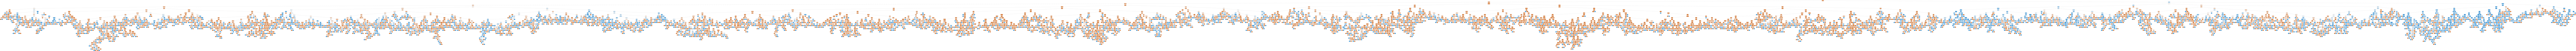

In [8]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_col,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('AILABDTREE.png')
Image(graph.create_png())

In [11]:
scores = cross_val_score(model, x_train, y_train, cv = 10)
print('Cross validation score: ', scores)

cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix = ', cm)


Cross validation score:  [0.78638985 0.79008074 0.7916955  0.78472543 0.78680203 0.79741578
 0.79349331 0.79464698 0.79603138 0.79229171]
Confusion Matrix =  [[12342  2061]
 [ 1857  2316]]


In [12]:

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

Accuracy = (TN + TP) / (TN + FP + TP + FN)
print('Accuracy = ', Accuracy)

Precision = TP / (TP + FP)
print('Precision = ', Precision)

Recall = TP / (TP + FN)
print('Recall = ', Recall)

print('F1 Score = ', 2 * (Precision * Recall) / (Precision + Recall))

Speciality = TN / (TN + FP)
print('Speciality ', Speciality)

Accuracy =  0.7890826873385013
Precision =  0.8569048114976047
Recall =  0.8692161419818297
F1 Score =  0.8630165722676737
Speciality  0.5291295407813571
